<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset

<img src="https://www.cityofames.org/Home/ShowImage?id=6334&t=635943415687730000">

(Image source: [City of Ames homepage](https://www.cityofames.org/about-ames))

We will use the "Ames Housing" dataset that describes properties in Ames (Iowa) together with their estimated value.
The list and explanation of all features can be found [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt), but we will concentrate only on a few columns, namely

- Lot Area (Continuous): Lot size in square feet
- Gr Liv Area (Continuous): Above grade (ground) living area square feet
- Total Bsmt SF (Continuous): Total square feet of basement area
- Garage Cars (Discrete): Size of garage in car capacity
- Overall Qual (Ordinal): Rates the overall material and finish of the house
- Overall Cond (Ordinal): Rates the overall condition of the house
- SalePrice (Continuous): Sale price


Our task is to predict the sale price from the other variables.

# Task: loading data and normalizing column names

In [2]:
! wget "https://drive.google.com/uc?export=download&id=1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9" -O AmesHousing.csv

--2024-01-02 17:23:46--  https://drive.google.com/uc?export=download&id=1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9
Resolving drive.google.com (drive.google.com)... 74.125.128.101, 74.125.128.102, 74.125.128.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gdulrrk51fgp2q4m9075cmg68jla7tl3/1704216225000/07111638629254909344/*/1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9?e=download&uuid=10cf2d79-389f-425b-a4d4-e74b38bd0776 [following]
--2024-01-02 17:23:46--  https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gdulrrk51fgp2q4m9075cmg68jla7tl3/1704216225000/07111638629254909344/*/1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9?e=download&uuid=10cf2d79-389f-425b-a4d4-e74b38bd0776
Resolving doc-04-bk-docs.googleusercontent.com (doc-04-bk-docs.googleusercontent.com)... 173.194.69.132, 2a00:

In [3]:
import numpy as np
random_seed = 111222
np.random.seed(random_seed) #This is good practice for reproducibiity

In [4]:
# Please load the dataset from AmesHousing.csv with Pandas
# and look into it
import pandas as pd

df = pd.read_csv('AmesHousing.csv')
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [5]:
## nothing to do, just check the column names
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
# Let's just look into the numeric columns
df = df[["Lot Area", "Gr Liv Area", "Total Bsmt SF", "Overall Qual", "Overall Cond", "Garage Cars", "SalePrice"]]
df.head()

,Lot Area,Gr Liv Area,Total Bsmt SF,Overall Qual,Overall Cond,Garage Cars,SalePrice
0,31770,1656,1080.0,6,5,2.0,215000
1,11622,896,882.0,5,6,1.0,105000
2,14267,1329,1329.0,6,6,1.0,172000
3,11160,2110,2110.0,7,5,2.0,244000
4,13830,1629,928.0,5,5,2.0,189900


In [7]:
## NOTE: THIS CELL IS AN **OPTIONAL** TASK FOR YOU TO PRACTICE DATA PREPARATION
## IF YOU WANT TO JUST FOCUS ON REGRESSION, SKIP **THIS CELL**

# Please normalize a column name by downcasing (turn into lower case) and replacing spaces with '_'.
# Write a function and use the rename dataframe method

df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

# Let's see how nice it is! :-)
df.head()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
0,31770,1656,1080.0,6,5,2.0,215000
1,11622,896,882.0,5,6,1.0,105000
2,14267,1329,1329.0,6,6,1.0,172000
3,11160,2110,2110.0,7,5,2.0,244000
4,13830,1629,928.0,5,5,2.0,189900


In [8]:
## run this cell to make sure that later, regression-related cells work for you,
## which refer to the lowercase saleprice variable
df.rename(columns=str.lower, inplace=True)

In [9]:
df.describe()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
count,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000,2929.000000,2930.000000
mean,10147.921843,1499.690444,1051.614544,6.094881,5.563140,1.766815,180796.060068
std,7880.017759,505.508887,440.615067,1.411026,1.111537,0.760566,79886.692357
min,1300.000000,334.000000,0.000000,1.000000,1.000000,0.000000,12789.000000
25%,7440.250000,1126.000000,793.000000,5.000000,5.000000,1.000000,129500.000000
50%,9436.500000,1442.000000,990.000000,6.000000,5.000000,2.000000,160000.000000
75%,11555.250000,1742.750000,1302.000000,7.000000,6.000000,2.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,10.000000,9.000000,5.000000,755000.000000


In [10]:
# Please drop rows with "empty" values
# Remember to use "inplace" syntax for dropping
# And the fact that you are dropping rows, not columns (although dropping rows is actually the default in pandas)

df.dropna(inplace=True)

df.describe()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.00000,2928.000000,2928.000000
mean,10149.730533,1499.784495,1051.680328,6.095970,5.56250,1.767077,180841.033811
std,7882.299902,505.522007,440.675942,1.410831,1.11157,0.760564,79889.904415
min,1300.000000,334.000000,0.000000,1.000000,1.00000,0.000000,12789.000000
25%,7440.750000,1126.000000,793.000000,5.000000,5.00000,1.000000,129500.000000
50%,9444.500000,1442.000000,990.000000,6.000000,5.00000,2.000000,160000.000000
75%,11556.000000,1742.250000,1302.000000,7.000000,6.00000,2.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,10.000000,9.00000,5.000000,755000.000000


# Task: Dividing the data

Please ALWAYS observe this pattern by your project, since without this you have no estimate for real performance!

In [11]:
from sklearn.model_selection import train_test_split
# This is THE gold standard, use it at all times!!!!!!
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Please use the above imported function to do a train-valid-test split of 80%-10%-10%
# So the trick will be to use train_test_split **twice**, choosing the test_size well!
# Make sure to set the random_state parameter to the random_seed.
# Note that we here just use train_test_split on the data "as is", not on separate X and y data
# (consequently, train_test_split will return just TWO things, not four).
# The assertions below should be satisfied, that means,
# the code will not run further if the shapes and names don't fit!

from sklearn.model_selection import train_test_split

df_train, df_validtest = train_test_split(df,test_size=0.2,random_state=random_seed,shuffle=True)
df_test, df_valid = train_test_split(df_validtest,test_size=0.5,random_state=random_seed,shuffle=True)

## the three variables below should be the name of the train, validation and test subdatasets!
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

assert df_train.shape==(2342, 7)
assert df_valid.shape==(293, 7)
assert df_test.shape==(293, 7)


(2342, 7)
(293, 7)
(293, 7)


# Task: Fitting a linear regression model

In [12]:
# Please build a pipeline under the variable "pipe" that consists of the application of a scaler
# and a linear regression model from Scikit, with the named step of "lr".
# Do the appropriate imports, of course.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("scaler", StandardScaler()),("lr",LinearRegression())])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [13]:
# Please train (fit) the pipe on the df_train data.
# Remember, your target variable should be the saleprice.
# Don't forget to remove the target variable (saleprice) from the input,
# and store the input in the variable train_input.
# The training should run on train_input as X and the saleprice column of your dataframe as y.

train_input = df_train.drop('saleprice',axis=1)
pipe.fit(train_input, df_train.saleprice)


## nothing to do here, we just display the coefficients:
coefs = pipe.named_steps["lr"].coef_
coefs

array([ 5745.50710428, 23254.21346451, 13694.16736287, 35903.63703616,
        2094.51751137, 12857.60167802])

In [14]:
# No task here. :-)
# This is just an intermediary step to transform the coefficients into a nice form, paired with their names, and ordered in a descending order.
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)] # This is a list comprehension inside, https://www.pythonforbeginners.com/basics/list-comprehensions-in-python
sorted(names_and_coefs, key=lambda x: x[1], reverse=True) #And this is a lambda https://www.w3schools.com/python/python_lambda.asp
# These are by no way mandatory elements of Python, but may come handy at times.

[('overall_qual', 35903.63703616176),
 ('gr_liv_area', 23254.213464510125),
 ('total_bsmt_sf', 13694.167362874134),
 ('garage_cars', 12857.601678018202),
 ('lot_area', 5745.507104276569),
 ('overall_cond', 2094.5175113673604)]

In [15]:
pipe.named_steps["lr"].intercept_ # nothing to do, we just display the intercept here

181944.80401366355

# Task: Predicting with the model

In [16]:
#Please predict on the training input first! (train_input)
train_lr_prediction = pipe.predict(train_input)

# Please import and calculate mean squared eror and mean absolute error metrics for the training!
# Use Scikit's metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(df_train.saleprice,train_lr_prediction)
mae = mean_absolute_error(df_train.saleprice,train_lr_prediction)

print("Train mean squared error:", mse)
print("Train mean abs. error:", mae)

Train mean squared error: 1463930137.8194811
Train mean abs. error: 24962.204115048527


In [17]:
valid_input = df_valid.drop("saleprice", axis=1)

valid_lr_prediction = pipe.predict(valid_input)

print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_lr_prediction))

Valid mean abs. error: 22846.818755667053


# Regularized versions

Below we have implemented the regularized versions of the regression.

The task here is just to observe their behavior and discuss it.



## Ridge

In [18]:
from sklearn.linear_model import Ridge
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("ridge", Ridge(alpha=1000.))])
pipe.fit(train_input, df_train.saleprice)
coefs = pipe.named_steps["ridge"].coef_
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)]
sorted(names_and_coefs, key=lambda x: x[1], reverse=True)

[('overall_qual', 25772.97082363602),
 ('gr_liv_area', 19764.50615135041),
 ('garage_cars', 14265.250254074763),
 ('total_bsmt_sf', 14126.034022848253),
 ('lot_area', 5169.265709223372),
 ('overall_cond', 798.3768940545825)]

In [19]:
train_ridge_prediction = pipe.predict(train_input)
print("Train mean squared error:", mean_squared_error(df_train.saleprice, train_ridge_prediction))
print("Train mean abs. error:", mean_absolute_error(df_train.saleprice, train_ridge_prediction))
valid_ridge_prediction = pipe.predict(valid_input)
print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_ridge_prediction))

Train mean squared error: 1595399923.3196523
Train mean abs. error: 24827.852793278067
Valid mean abs. error: 23358.257196754606


## Lasso

In [20]:
from sklearn.linear_model import Lasso
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lasso", Lasso(alpha=3000))])
pipe.fit(train_input, df_train.saleprice)
coefs = pipe.named_steps["lasso"].coef_
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)]
sorted(names_and_coefs, key=lambda x: x[1], reverse=True)

[('overall_qual', 35004.25685848138),
 ('gr_liv_area', 22527.03881289466),
 ('total_bsmt_sf', 12363.419542632972),
 ('garage_cars', 11341.026357419278),
 ('lot_area', 3582.024126333946),
 ('overall_cond', 0.0)]

In [21]:
train_lasso_prediction = pipe.predict(train_input)
print("Train mean squared error:", mean_squared_error(df_train.saleprice, train_lasso_prediction))
print("Train mean abs. error:", mean_absolute_error(df_train.saleprice, train_lasso_prediction))
valid_lasso_prediction = pipe.predict(valid_input)
print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_lasso_prediction))

Train mean squared error: 1486618001.701819
Train mean abs. error: 24918.258066677205
Valid mean abs. error: 22942.236889520365


# Task: Observe!

**Please observe the training of Ridge and LASSO on the same data!**

**Can you mention some interesting / specific observations about the training of these methods?**

# Task: Look at residuals

(For more sophisticated inspection of residuals you can use [Yellowbricks](http://www.scikit-yb.org/en/latest/index.html), but let's stick to a manual apprach for now.)

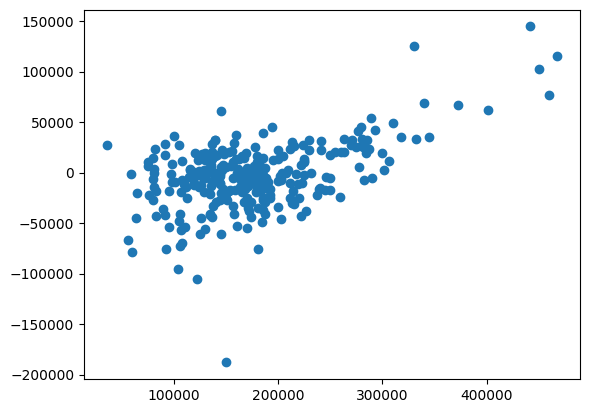

In [23]:
import matplotlib.pyplot as plt

# Please visualize with a scatterplot the residuals of the LASSO prediction
# Let's for now take residuals as being the prediction substracted from the real target value
# Do the visualization that plots residuals against the y value!

import matplotlib.pyplot as plt

lasso_resid = df_valid.saleprice.values-valid_lasso_prediction

plt.scatter(df_valid.saleprice.values, lasso_resid)
plt.show()

**Please observe and share with us the conclusions!**